### Compare BUTD features with my features

In [68]:
import numpy as np
import os
import os.path as osp
import json
import collections
from tqdm import tqdm
import operator
import matplotlib.pyplot as plt

In [69]:
def draw_histogram(wd_cnt, topK=10, title=None, width=8, height=4):
    wd_cnt = wd_cnt[:topK]
    wds = [wd for wd, _ in wd_cnt]
    cnts = [cnt for _, cnt in wd_cnt]
    plt.rcParams['figure.figsize'] = (width, height)
    plt.bar(np.arange(len(wds)), cnts)
    plt.xticks(np.arange(len(wds)), wds, rotation=45, ha='right')
    if title:
        plt.title(title)
    plt.grid(linestyle=':', linewidth='0.5', color='gray')
    plt.gca().xaxis.grid(False)
    plt.show()

#### Check MCAN-VQA (original BUTD) features

In [70]:
butd_feats_dir = '../projects/mcan-vqa/datasets/coco_extract/train2014/'
feat_files = [osp.join(butd_feats_dir, f) for f in os.listdir(butd_feats_dir)]
print(f'There are {len(feat_files)} features in {butd_feats_dir}.')
# check one feature
list(np.load(feat_files[0]).keys())

There are 82783 features in ../projects/mcan-vqa/datasets/coco_extract/train2014/.


['x', 'image_w', 'bbox', 'num_bbox', 'image_h']

In [71]:
feat = np.load(feat_files[0])
feat['x'].shape

(2048, 46)

100%|██████████| 82783/82783 [00:31<00:00, 2658.28it/s]


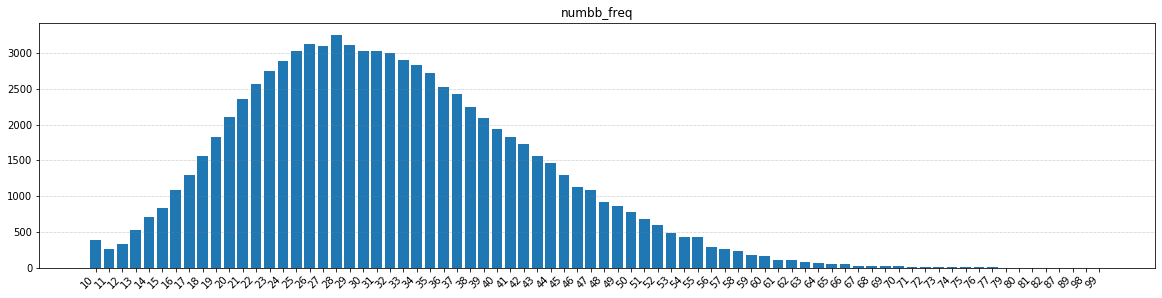

In [72]:
# check distribution of number of boxes per image
numbb_to_cnt = collections.Counter()
for feat_file in tqdm(feat_files):
    feat = np.load(feat_file)
    numbb_to_cnt[int(feat['num_bbox'])] += 1
# draw histogram
numbb_cnt = sorted(numbb_to_cnt.items(), key=operator.itemgetter(0), reverse=False)
draw_histogram(numbb_cnt, 100, 'numbb_freq', width=20, height=4.5)

  1%|          | 256/40504 [00:00<00:15, 2551.17it/s]

There are 40504 features in ../projects/mcan-vqa/datasets/coco_extract/val2014/.


100%|██████████| 40504/40504 [00:15<00:00, 2633.76it/s]


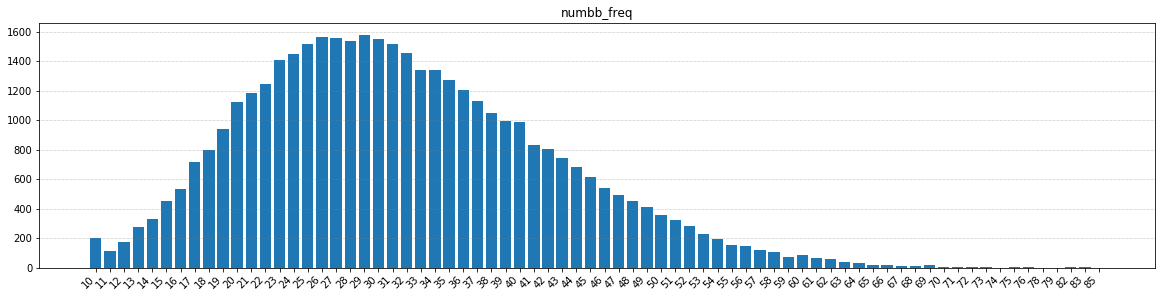

In [73]:
butd_feats_dir = '../projects/mcan-vqa/datasets/coco_extract/val2014/'
feat_files = [osp.join(butd_feats_dir, f) for f in os.listdir(butd_feats_dir)]
print(f'There are {len(feat_files)} features in {butd_feats_dir}.')
# check distribution of number of boxes per image
numbb_to_cnt = collections.Counter()
for feat_file in tqdm(feat_files):
    feat = np.load(feat_file)
    numbb_to_cnt[int(feat['num_bbox'])] += 1
numbb_cnt = sorted(numbb_to_cnt.items(), key=operator.itemgetter(0), reverse=False)
draw_histogram(numbb_cnt, 100, 'numbb_freq', width=20, height=4.5)

#### Check my features

  0%|          | 238/82783 [00:00<00:34, 2377.26it/s]

There are 82783 features in ../output/coco_c4_feats/nms0.30_conf0.20_max100_min10/train2014/features.


100%|██████████| 82783/82783 [00:34<00:00, 2404.17it/s]


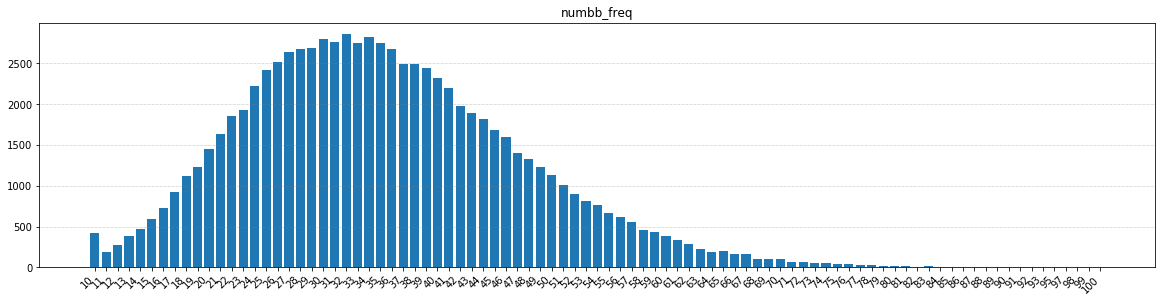

In [78]:
butd_feats_dir = '../output/coco_c4_feats/nms0.30_conf0.20_max100_min10/train2014/features'
feat_files = [osp.join(butd_feats_dir, f) for f in os.listdir(butd_feats_dir)]
print(f'There are {len(feat_files)} features in {butd_feats_dir}.')
# check one feature
list(np.load(feat_files[0]).keys())
# check distribution of number of boxes per image
numbb_to_cnt = collections.Counter()
for feat_file in tqdm(feat_files):
    feat = np.load(feat_file)
    numbb_to_cnt[feat['norm_bb'].shape[0]] += 1
numbb_cnt = sorted(numbb_to_cnt.items(), key=operator.itemgetter(0), reverse=False)
draw_histogram(numbb_cnt, 100, 'numbb_freq', width=20, height=4.5)

  1%|          | 237/40504 [00:00<00:17, 2367.64it/s]

There are 40504 features in ../output/coco_c4_feats/nms0.30_conf0.20_max100_min10/val2014/features.


100%|██████████| 40504/40504 [00:16<00:00, 2445.45it/s]


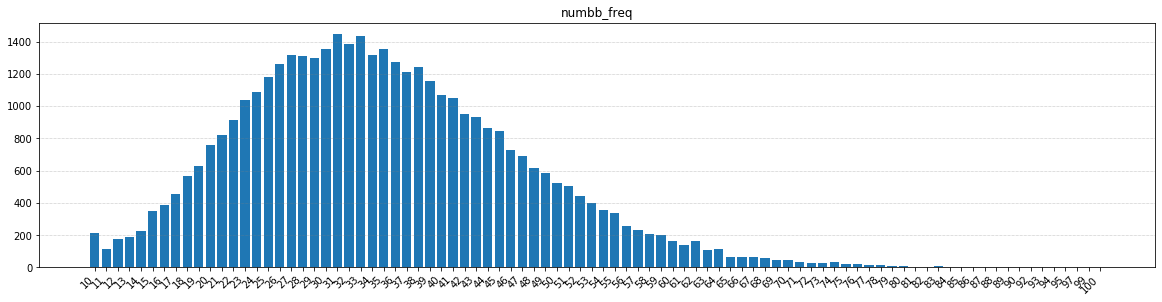

In [79]:
butd_feats_dir = '../output/coco_c4_feats/nms0.30_conf0.20_max100_min10/val2014/features'
feat_files = [osp.join(butd_feats_dir, f) for f in os.listdir(butd_feats_dir)]
print(f'There are {len(feat_files)} features in {butd_feats_dir}.')
# check distribution of number of boxes per image
numbb_to_cnt = collections.Counter()
for feat_file in tqdm(feat_files):
    feat = np.load(feat_file)
    numbb_to_cnt[feat['norm_bb'].shape[0]] += 1
numbb_cnt = sorted(numbb_to_cnt.items(), key=operator.itemgetter(0), reverse=False)
draw_histogram(numbb_cnt, 100, 'numbb_freq', width=20, height=4.5)